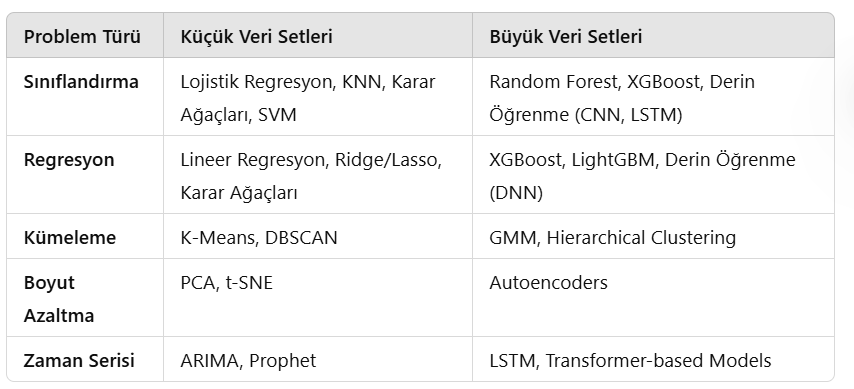

In [1]:
import numpy as np 
import pandas as pd 
import difflib 
from  sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
movies_data = pd.read_csv('movies.csv')

In [3]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
movies_data.shape

(4803, 24)

In [5]:
select_featurre = ['genres', 'keywords', 'tagline', 'cast','director']

In [6]:
for feature in select_featurre:
    movies_data[feature] = movies_data[feature].fillna('')


In [7]:
combined_features = (
    movies_data['genres'] + ' ' + 
    movies_data['keywords'] + ' ' + 
    movies_data['tagline'] + ' ' + 
    movies_data['cast'] + ' ' + 
    movies_data['director']
)

In [8]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [9]:
vectorizer = TfidfVectorizer()

In [10]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [11]:
print(feature_vectors)

  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.24713765026964
  (4801, 17266)	0.28860981849329476
  (4801, 13835)	0.27870029291200094
  (4801, 13175)	0.28860981849329476
  (4801, 171

Cosine Similarity

In [12]:
similarity = cosine_similarity(feature_vectors)

In [13]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [14]:
similarity.shape

(4803, 4803)

In [15]:
movie_name = input("Enther your  favorite movie name : ")

In [16]:
list_of_all_titles = movies_data['title'].tolist()
list_of_all_titles

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

In [17]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
find_close_match

['Selena', 'The Client', 'Memento']

In [18]:
close_match = find_close_match[0]
close_match

'Selena'

In [19]:
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

2131


In [20]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
similarity_score

[(0, 0.027332782288478928),
 (1, 0.04343459596840844),
 (2, 0.011708511243463194),
 (3, 0.0073377889323284415),
 (4, 0.0),
 (5, 0.040169543291052254),
 (6, 0.020373422333691306),
 (7, 0.0),
 (8, 0.013544187131593716),
 (9, 0.0),
 (10, 0.015993692182381027),
 (11, 0.0),
 (12, 0.0),
 (13, 0.013108514750632589),
 (14, 0.022392530113465238),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0038516810250957155),
 (19, 0.018363849266483802),
 (20, 0.03216039103234426),
 (21, 0.0),
 (22, 0.015484416626639479),
 (23, 0.0069719566973427535),
 (24, 0.022374121698554288),
 (25, 0.0128154787494934),
 (26, 0.0),
 (27, 0.0036724019388665384),
 (28, 0.004031863949824188),
 (29, 0.0),
 (30, 0.0482341476969738),
 (31, 0.007923692074813117),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.010712419871476904),
 (38, 0.0),
 (39, 0.0037966207094699152),
 (40, 0.004271439196760405),
 (41, 0.0),
 (42, 0.0),
 (43, 0.008195720178496475),
 (44, 0.01098182671369423),
 (45, 0.011546621874114843),
 

In [21]:
len(similarity_score)

4803

In [22]:
sorted_similar_movies = sorted(similarity_score,key = lambda x:x[1], reverse=True )
sorted_similar_movies

[(2131, 1.0),
 (3922, 0.20422510129108182),
 (4269, 0.15658562195634007),
 (3837, 0.10607168494440879),
 (4636, 0.10529973696360735),
 (2205, 0.09949091284250522),
 (2399, 0.08950633078932467),
 (1708, 0.08763157178067917),
 (4216, 0.08704092920547851),
 (1595, 0.08625344193011272),
 (3864, 0.08455718189000778),
 (156, 0.0841581645837273),
 (324, 0.08396603117349871),
 (3239, 0.08206913153598643),
 (1329, 0.08036444245885996),
 (3529, 0.07913222187004308),
 (776, 0.07902597276704958),
 (1725, 0.07788270641461889),
 (215, 0.07726687122327294),
 (2096, 0.0757301350598144),
 (1190, 0.07502072135375146),
 (3287, 0.07370832704396543),
 (1657, 0.07123846477992715),
 (874, 0.07116056743012165),
 (3534, 0.07068988349908947),
 (3704, 0.07066739744430733),
 (2461, 0.06921180288575943),
 (871, 0.06799442318832902),
 (1002, 0.06792025243769649),
 (3842, 0.06789927517189781),
 (4383, 0.06769332920908204),
 (1527, 0.06647927407294359),
 (2789, 0.06620563197602122),
 (1038, 0.06572678210157738),
 (46

In [23]:
print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Selena
2 . Real Women Have Curves
3 . The Ballad of Gregorio Cortez
4 . She's the One
5 . Chuck & Buck
6 . Undisputed
7 . Black Nativity
8 . The Wedding Planner
9 . Mr. Smith Goes to Washington
10 . Glory Road
11 . Choke
12 . The Last Samurai
13 . The Road to El Dorado
14 . Stand by Me
15 . What to Expect When You're Expecting
16 . Shine
17 . Winter's Tale
18 . Blade Runner
19 . Fantastic 4: Rise of the Silver Surfer
20 . The Conjuring
21 . Shall We Dance?
22 . The Land Girls
23 . An Unfinished Life
24 . Anastasia
25 . Galaxina
26 . Salvador
27 . Moonrise Kingdom
28 . Gigli
29 . The One


In [24]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Memento
2 . 30 Days of Night
3 . The Crew
4 . Trees Lounge
5 . Suspect Zero
6 . Disturbia
7 . Dragon Nest: Warriors' Dawn
8 . The Prestige
9 . The Flintstones in Viva Rock Vegas
10 . Fido
11 . The Long Kiss Goodnight
12 . The Dark Knight Rises
13 . Clay Pigeons
14 . 2:13
15 . Before I Go to Sleep
16 . Silent Hill: Revelation 3D
17 . Lockout
18 . The Matrix Revolutions
19 . Ravenous
20 . The Matrix Reloaded
21 . The Time Machine
22 . The Matrix
23 . Bound
24 . Remember Me, My Love
25 . Red Planet
26 . Taxman
27 . Baby's Day Out
28 . Memoirs of an Invisible Man
29 . The Fugitive


In [26]:
# modeli kaydet 
import pickle

# Save the model to disk
with open('model.pkl', 'wb') as file:
    pickle.dump(feature_vectors, file)
